# Linear Regression Example with Seaborn's Tips Dataset
In this example, we will build a simple linear regression model to predict the tip amount based on the total bill from Seaborn's "tips" dataset. We'll use a set of custom functions to compute the slope, intercept, predictions, and R-squared for our linear regression.

# Importing Required Libraries
First, let's import the necessary Python libraries for data manipulation, linear regression, and visualization.

In [2]:
import numpy as np  # For mathematical operations
import pandas as pd  # For data manipulation
import seaborn as sns  # For accessing the Seaborn datasets
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets


# Loading the Tips Dataset
Seaborn has a built-in "tips" dataset that contains information about tips received by waitstaff at a restaurant. Let's load this dataset and examine its structure.

In [3]:
# Load the Seaborn "tips" dataset
tips_df = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Selecting Features for Linear Regression
Analyzing Features in the Tips Dataset
Let's examine the dataset to understand the distributions and relationships between different features and the target variable (tip).

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


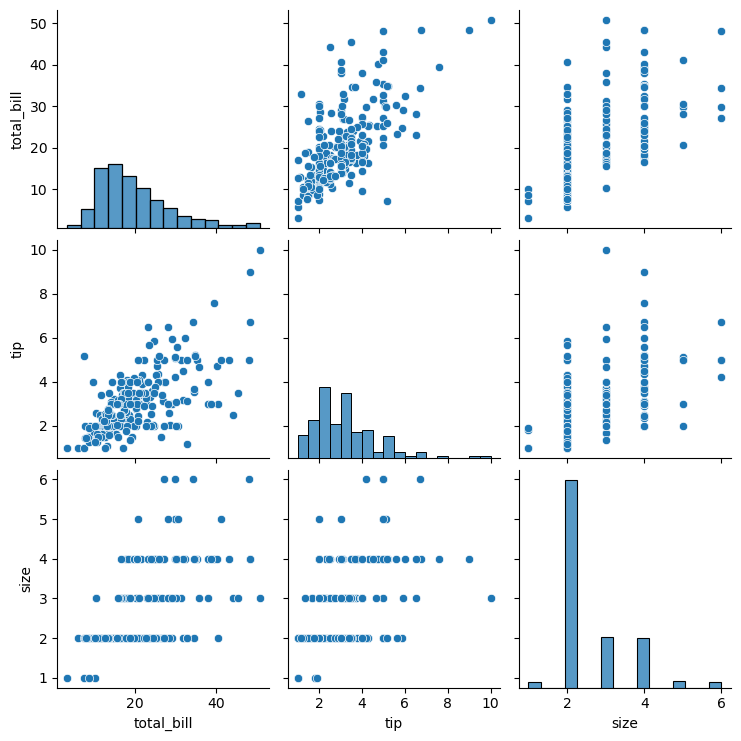

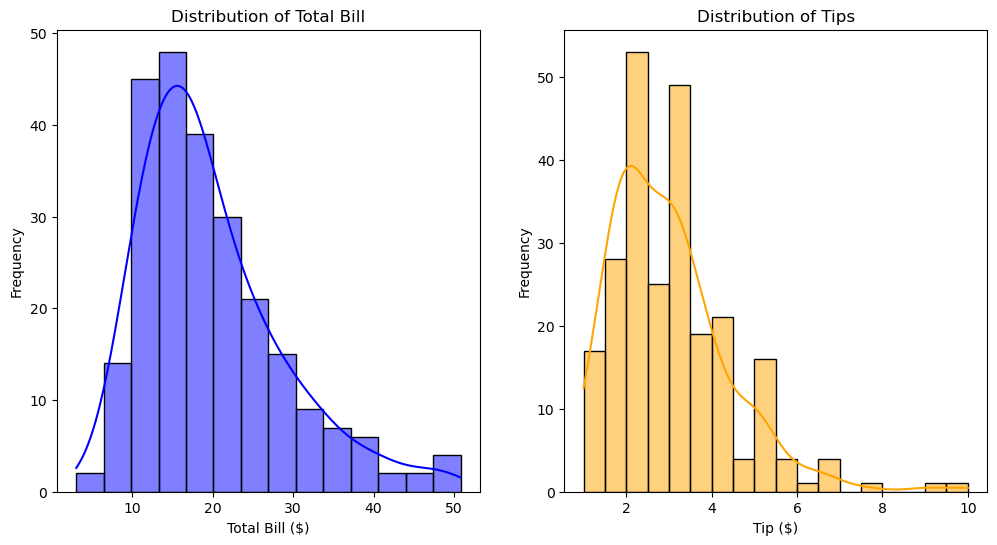

In [4]:
# Pairplot to visualize relationships between features
sns.pairplot(tips_df)
plt.show()

# Distribution of total_bill and tip
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tips_df['total_bill'], kde=True, color='b')
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(tips_df['tip'], kde=True, color='orange')
plt.title("Distribution of Tips")
plt.xlabel("Tip ($)")
plt.ylabel("Frequency")
plt.show()






# Splitting Data into Training and Test Sets
We need to divide the dataset into training and test sets for building and testing the model.

In [6]:
X = tips_df['total_bill']  # The feature used for prediction
y = tips_df['tip']  # The target variable to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Defining Functions for Linear Regression
Here, we define functions to calculate the slope, intercept, predictions, and R-squared for our linear regression model.


In [7]:
# Function to calculate the slope of the regression line
def calculate_slope(x, y):
    n = len(x)
    dot_sum = np.sum(x * y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(x**2)
    slope = (n * dot_sum - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    return slope

# Function to calculate the intercept of the regression line
def calculate_intercept(x, y):
    slope = calculate_slope(x, y)
    intercept = np.mean(y) - slope * np.mean(x)
    return intercept

# Function to make predictions using slope and intercept
def make_predictions(slope, x, intercept):
    return slope * x + intercept

# Function to calculate R-squared for model evaluation
def calculate_r_squared(predictions, actual):
    total_ss = np.sum((actual - np.mean(actual))**2)
    residual_ss = np.sum((actual - predictions)**2)
    r_squared = 1 - (residual_ss / total_ss)
    return r_squared


# Building and Testing the Linear Regression Model
With the functions defined, we can compute the slope and intercept for our linear regression model, then make predictions for the test set and evaluate the model with R-squared.

In [8]:
# Calculate slope and intercept
slope = calculate_slope(X_train, y_train)
intercept = calculate_intercept(X_train, y_train)

# Make predictions on the test set
test_predictions = make_predictions(slope, X_test, intercept)

# Calculate R-squared for model evaluation
r_squared = calculate_r_squared(test_predictions, y_test)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)


Slope: 0.10941450882568882
Intercept: 0.8615983766707882
R-squared: 0.440135021114049


# Plotting the Linear Regression Line
Let's plot the linear regression line and scatter plot to visualize the relationship between the total bill and the tip.

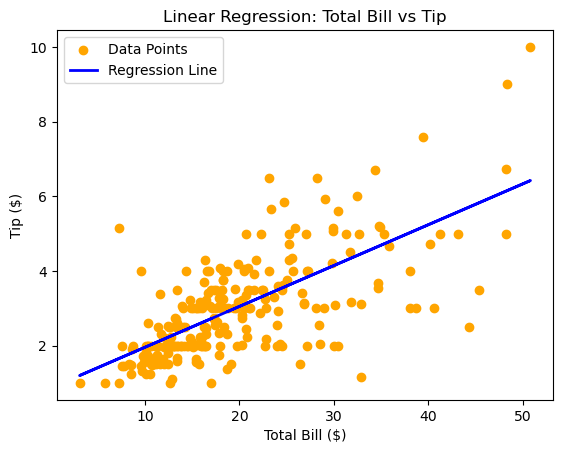

In [9]:
# Scatter plot with linear regression line
plt.scatter(X, y, color='orange', label='Data Points')
y_estimated = slope * X + intercept
plt.plot(X, y_estimated, color='blue', linewidth=2, label='Regression Line')
plt.legend(loc='best')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Linear Regression: Total Bill vs Tip')
plt.show()


R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable (in this case, tips) that can be explained by the independent variable(s) (total bill, in this context). A higher R² value indicates a better fit between the independent and dependent variables. The R² for "total bill" and "tips" is lower than expected 0.45 

Improving a low R-squared in a linear regression model requires exploring different features, data transformations, and potentially different algorithms. Here are some strategies to improve the predictive performance when working with the "tips" dataset or similar problems where the linear relationship seems weak:

# Feature Engineering
Additional Features: Look for additional factors that could impact the target variable. For the "tips" dataset, consider features like party size, day of the week, time of day, gender, and smoker/non-smoker status.

Polynomial Features: Introduce polynomial features to capture non-linear relationships. For example, add a squared or cubic term for "total bill."

Interaction Features: Create interaction terms that represent combinations of existing features (e.g., party size times total bill).